In [287]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Prep

In [288]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['ocean_proximity']

In [289]:
for col in strings:
    df[col] = df[col].str.lower()

In [290]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near bay
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland


In [291]:
# Question no.1: finding out feature with missing value if any?
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [292]:
df.isna().sum()
#Answer : There is only one feature(total_bedrooms), having 207 missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [293]:
# Q.2: What's the median (50% percentile) for variable 'population'?
df['population']

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Name: population, Length: 20640, dtype: float64

In [294]:
df['population'].median()

1166.0

In [295]:
df['total_bedrooms'].median()

435.0

In [296]:
n = len(df)
n_train = int(n*.6)
n_val = int(n*.2)
n_test = int(n -(n_train - n_val))

n_train, n_val, n_test

(12384, 4128, 12384)

In [297]:

np.random.seed(42)
indx = np.arange(n)
np.random.shuffle(indx)

In [298]:
df_train = df.iloc[indx[:n_train]]
df_val = df.iloc[indx[n_train:n_train+n_val]]
df_test = df.iloc[indx[n_train+n_val:]]

In [299]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [300]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)


In [301]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the    code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

# train Model

In [302]:
# filling the missing values:
df_train.fillna(0).isnull()
df_val.fillna(0).isnull()
df_test.fillna(0).isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

# Simple Regression Model

In [303]:
x = [2,3,4,5]
w = [.1,.02,.01, .5]
w0 = 5.5

y = [2800, 2170, 110160, 35500]

In [304]:
def linear_regression(x, w ):
    pred = w0
    n = len(x)
    for j in range(n):
        pred = pred + x[j] + w[j]
    return pred

In [305]:
linear_regression(x,w)

20.13

# Vector form

In [306]:
def dot(x,w):
    res = 0.0
    n = len(x)
    for j in range(n):
        res = res + x[j] + w[j]
    return res
    
    
def linear_regression(x):
    return w0 + dot(x,w)

In [307]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w
w = np.array(w)

x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

def linear_regression(X):
    return X.dot(w)
    

# Training Model

In [308]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
ones = np.ones(X.shape[0])
X = np.column_stack([ ones,X])

y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [309]:
def train_linear_regression(X, y):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ ones,X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

# Baseline Model

In [310]:
# Set baseline for training
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [311]:

base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)


<Axes: ylabel='Count'>

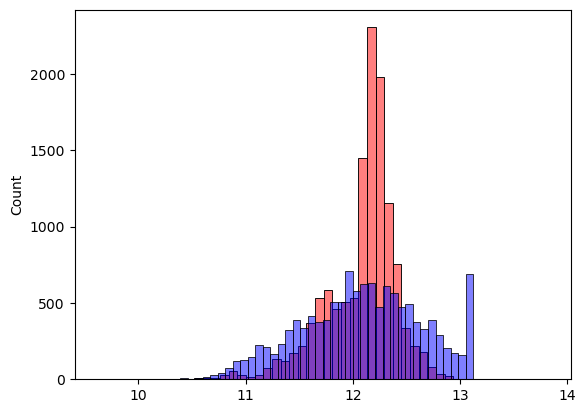

In [312]:
sns.histplot(y_pred, label = 'prediction',color='red', alpha=0.5, bins=50)
sns.histplot(y_train, label = 'target', color='blue', alpha=0.5, bins=50)

# RMSE

In [313]:
def rmse(y_pred, y_train):
    err = y_pred - y_train
    sq_err = err**2
    sq_err_mean = np.mean(sq_err)
    
    return np.sqrt(sq_err_mean)

score = rmse(y_pred, y_train)
score

0.4617345557213994

# Validation of Model

In [314]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [315]:
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

def prepare_X(df):
    X = df[base].fillna(0).values
    return X

X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)

y_pred_val = w0 + X_val.dot(w)

score = rmse(y_pred_val, y_val)
score

0.3295330365227396

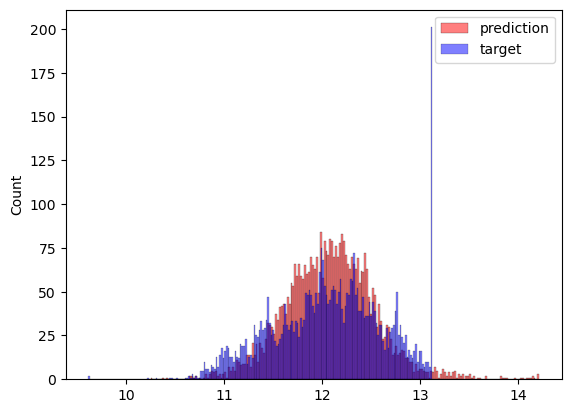

In [316]:
sns.histplot(y_pred_val, label = 'prediction',color='red', alpha=0.5, bins=200)
sns.histplot(y_val, label = 'target', color='blue', alpha=0.5, bins=200)
plt.legend()

# Simple Feature Engineering:

In [317]:
print("not required")

not required


# Categorical Variables

In [318]:
df_train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
dtype: object

In [319]:
df_train.ocean_proximity.unique()

array(['inland', 'near bay', '<1h ocean', 'near ocean', 'island'],
      dtype=object)

In [320]:
df_train.nunique()

longitude              782
latitude               801
housing_median_age      52
total_rooms           4870
total_bedrooms        1681
population            3294
households            1574
median_income         8689
ocean_proximity          5
dtype: int64

In [321]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,inland
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,inland
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,near bay
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1h ocean
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,near ocean
...,...,...,...,...,...,...,...,...,...
12379,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327,<1h ocean
12380,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798,<1h ocean
12381,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530,inland
12382,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566,inland


In [365]:
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

categorical_columns = ['ocean_proximity']
categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)
    

def prepare_X(df):
    df = df.copy()
    features = base.copy()

    for name, values in categorical.items():
        for value in values:
            if value in ['inland','near bay','<1h ocean','near ocean']: #check result on island 
                df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
                features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [368]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)
print(rmse(y_val, y_pred_val))


0.3185774946054032


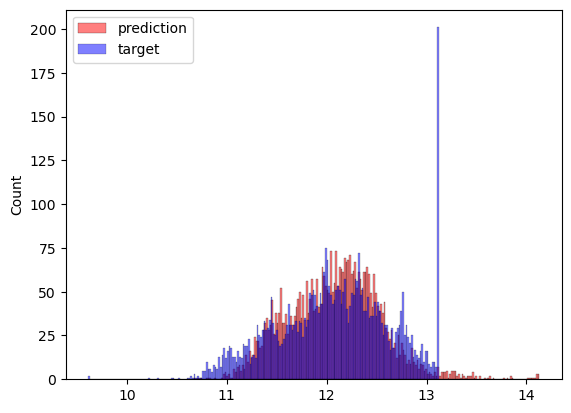

In [367]:
sns.histplot(y_pred_val, label = 'prediction',color='red', alpha=0.5, bins=200)
sns.histplot(y_val, label = 'target', color='blue', alpha=0.5, bins=200)
plt.legend()

# Regularization

In [381]:
def train_linear_regression_reg(X, y, r=0.01):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ ones,X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [382]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)
print(rmse(y_val, y_pred_val))

0.31857893702057616


# Tuning the model

In [383]:
R = [1,2,10, .1,.01,.001,.0001,.00001,.0000001]
for r in R:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train,r)
    
    X_val = prepare_X(df_val)
    y_pred_val = w0 + X_val.dot(w)
   
    score = rmse(y_pred_val, y_val)
    print(r,w0,score)

1 -0.4534563628678985 0.31870429550939083
2 -0.2846194370379078 0.3187813714819206
10 -0.07277890810297505 0.3189269460923024
0.1 -1.0588025324610442 0.31859144931856465
0.01 -1.2571127835814409 0.31857893702057616
0.001 -1.2823176404125824 0.31857763970997477
0.0001 -1.2849086926162165 0.3185775091258034
1e-05 -1.285168526029345 0.3185774960568475
1e-07 -1.285197117339969 0.3185774946196223


In [384]:
# use the vlaue of r = 0.001
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)
print(rmse(y_val, y_pred_val))

0.31857893702057616


# Using the model

### on test set

In [385]:
df_full_train = pd.concat([df_train, df_val])

df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)

In [386]:
X_full_train

array([[-119.01,   36.06,   25.  , ...,    1.  ,    0.  ,    0.  ],
       [-119.46,   35.14,   30.  , ...,    1.  ,    0.  ,    0.  ],
       [-122.44,   37.8 ,   52.  , ...,    0.  ,    0.  ,    1.  ],
       ...,
       [-120.71,   38.34,   16.  , ...,    1.  ,    0.  ,    0.  ],
       [-117.13,   32.91,   16.  , ...,    0.  ,    0.  ,    0.  ],
       [-117.93,   33.71,   10.  , ...,    0.  ,    0.  ,    0.  ]])

In [387]:
y_full_train = np.concatenate([y_train, y_val])

In [388]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train)

In [389]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.3398960168845671

In [390]:
house_price = df_test.iloc[20].to_dict()
house_price

{'longitude': -117.09,
 'latitude': 32.9,
 'housing_median_age': 16.0,
 'total_rooms': 1989.0,
 'total_bedrooms': 290.0,
 'population': 814.0,
 'households': 291.0,
 'median_income': 6.2715,
 'ocean_proximity': '<1h ocean'}

In [391]:
df_small = pd.DataFrame([house_price])
df_small

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-117.09,32.9,16.0,1989.0,290.0,814.0,291.0,6.2715,<1h ocean


In [392]:
X_small = prepare_X(df_small)

In [396]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
np.expm1(y_pred)

288114.09969763586

In [397]:
np.expm1(y_test[20])

255100.0000000001